<a href="https://colab.research.google.com/github/fralfaro/aves/blob/master/docs/notebooks/vis-course/06-python-texto-guaguas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad Práctica 6: Texto en Tablas

En este notebook exploraremos algunas visualizaciones donde el texto es protagonista a través del dataset [guaguas](https://github.com/rivaquiroga/guaguas) preparado por [Riva Quiroga](https://twitter.com/rivaquiroga). Algunos de los análisis están inspirados en los ejemplos que ella incluyó en el repositorio de guaguas.


**PENDIENTE**: este notebook es preliminar. Debo agregar las explicaciones aún ;)


## Google Colab

Para ejecutar este notebook en Colab, primero ejecuten la siguiente celda. Luego el notebook se reiniciará.

In [1]:
try:
    import google.colab
    !pip uninstall matplotlib -y
    !pip install -q condacolab
    
    import condacolab
    condacolab.install_mambaforge()
except ModuleNotFoundError:
    pass

Una vez que se ha reiniciado puedes ejecutar el resto de las celdas.

In [2]:
try:
    import google.colab
    !git clone https://github.com/zorzalerrante/aves.git aves_git
    !mamba env update --name base --file aves_git/environment-colab.yml
except ModuleNotFoundError:
    pass

## Preámbulo, Carga y Preparación de Datos

In [3]:
import sys
from pathlib import Path

AVES_ROOT = Path("../..") if not 'google.colab' in sys.modules else Path("aves_git")
GUAGUAS_PATH = AVES_ROOT /"data" / "external" / "guaguas"
GUAGUAS_PATH

PosixPath('../../data/external/guaguas')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from aves.features.utils import normalize_rows

import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 150
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"


In [5]:
guaguas = pd.read_csv(GUAGUAS_PATH / '1920-2021.csv.gz')
guaguas.head()

anio    nombre sexo   n  proporcion
0  1920     Aaron    M   1    0.000049
1  1920  Abdolina    F   1    0.000049
2  1920     Abdon    M   1    0.000049
3  1920     Abdón    M   2    0.000098
4  1920      Abel    M  11    0.000540

In [6]:
total_n = guaguas.groupby('nombre')['n'].sum().sort_values(ascending=False)
total_n

nombre
María          961020
José           588613
Juan           581513
Luis           505794
Carlos         293719
                ...  
Idiomelina          1
Idiomelinda         1
Idiomere            1
Idiomira            1
Üllmen              1
Name: n, Length: 195841, dtype: int64

In [7]:
total_n[total_n > 100]

nombre
María       961020
José        588613
Juan        581513
Luis        505794
Carlos      293719
             ...  
Camilla        101
Rumildo        101
Imelda         101
Ponciano       101
Ethian         101
Name: n, Length: 4431, dtype: int64

In [8]:
tabla_anual = (
    guaguas[guaguas["nombre"].isin(total_n[total_n > 100].index)]
    .groupby(["anio", "nombre"])["n"]
    .sum()
    .unstack(fill_value=0)
)
tabla_anual.columns = list(tabla_anual.columns)
tabla_anual


Aaron  Aarón  Abby  Abdias  Abdiel  Abdón  Abel  Abelardo  Abelina  \
anio                                                                       
1920      1      0     0       0       0      2    11        10        2   
1921      0      0     0       1       1      3    44        18        9   
1922      0      0     0       1       0     12    45        28        8   
1923      0      0     0       1       0      8    34        27       11   
1924      2      0     0       0       0      7    40        29        6   
...     ...    ...   ...     ...     ...    ...   ...       ...      ...   
2017    211    200    52      10      58      3    31         0        0   
2018    176    201    48       4      64      2    36         0        0   
2019    149    221    45      11     115      2    58         2        0   
2020    148    191    70       8     110      0    45         0        0   
2021    172    195    71       9      75      2    38         1        0   

      Abelino  ...  Ágatha  Álvaro  Ámbar  Ángel  Ángela  Áurea  Ían  Ítala  \
anio           ...                                                            
1920        3  ...       0       4      0      1       0      2    0      0   
1921        5  ...       0      15      0      0       0      5    0      0   
1922        7  ...       0      16      0      0       0      4    0      3   
1923        4  ...       0      14      1      0       0      3    0      1   
1924       11  ...       0      23      0      0       0      5    0      0   
...       ...  ...     ...     ...    ...    ...     ...    ...  ...    ...   
2017        0  ...      16     266    454    121      37      0   10      0   
2018        0  ...      12     265    690    137      25      1    7      1   
2019        0  ...      56     198    734    121      30      1   18      0   
2020        1  ...      47     180    671    120      32      1   13      0   
2021        0  ...      36     159    322    113      31      0   13      0   

      Ítalo  Úrsula  
anio                 
1920      1       2  
1921      3       3  
1922      6       6  
1923      4       4  
1924      3      11  
...     ...     ...  
2017      0       8  
2018      4      14  
2019      5       6  
2020      2      12  
2021      4       4  

[102 rows x 4431 columns]

In [9]:
from aves.features.utils import tfidf, normalize_rows

Text(0.0, 1.0, 'Uso de los nombres Salvador y Augusto')

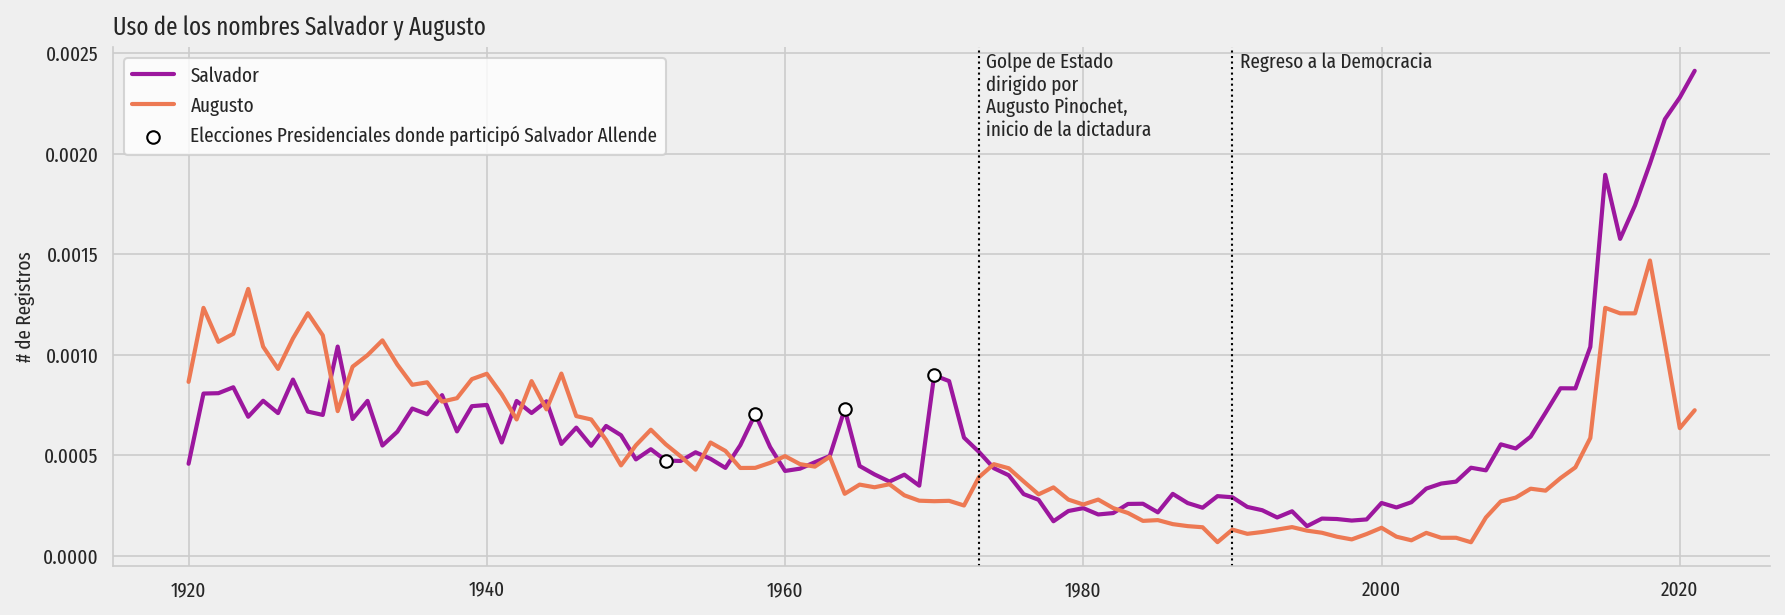

In [10]:
def plot_nameseries(names):

    fig, ax = plt.subplots(figsize=(12, 4))

    names.plot(
        ax=ax,
        color=sns.color_palette("plasma", n_colors=len(names.columns)),
        linewidth=2,
    )

    fig.set_facecolor("#efefef")
    ax.set_facecolor("#efefef")
    sns.despine(ax=ax)

    ax.set_xlabel("")
    ax.set_ylabel("# de Registros")

    fig.tight_layout()

    return fig, ax


fig, ax = plot_nameseries(tabla_anual.pipe(normalize_rows)[["Salvador", "Augusto"]])

ax.axvline(1973, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Golpe de Estado\ndirigido por\nAugusto Pinochet,\ninicio de la dictadura",
    xy=(1973.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.axvline(1990, linestyle="dotted", linewidth=1, color="black")
ax.annotate(
    "Regreso a la Democracia",
    xy=(1990.5, 0.99),
    xycoords=("data", "axes fraction"),
    ha="left",
    va="top",
)

ax.scatter(
    [1952, 1958, 1964, 1970],
    tabla_anual.pipe(normalize_rows).loc[[1952, 1958, 1964, 1970], "Salvador"],
    color="white",
    edgecolor="black",
    label="Elecciones Presidenciales donde participó Salvador Allende",
    zorder=5,
)

ax.legend()
ax.set_title("Uso de los nombres Salvador y Augusto", loc="left")


Text(0.0, 1.0, 'Los nombres de Romané (TVN, 2000)')

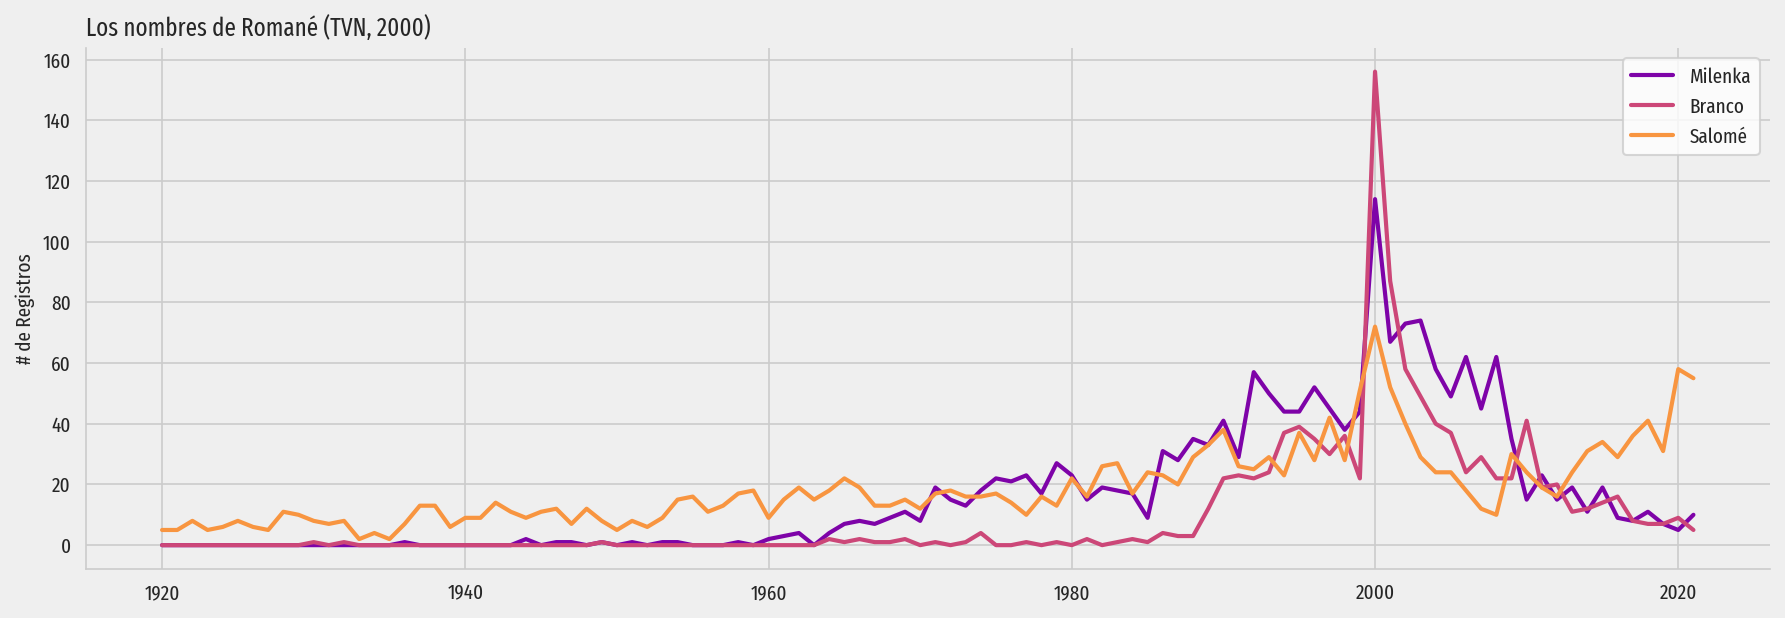

In [11]:
fig, ax = plot_nameseries(tabla_anual[["Milenka", "Branco", "Salomé"]].fillna(0))

ax.set_title("Los nombres de Romané (TVN, 2000)", loc="left")


Text(0.0, 1.0, "Everybody (Backstreet's Back)")

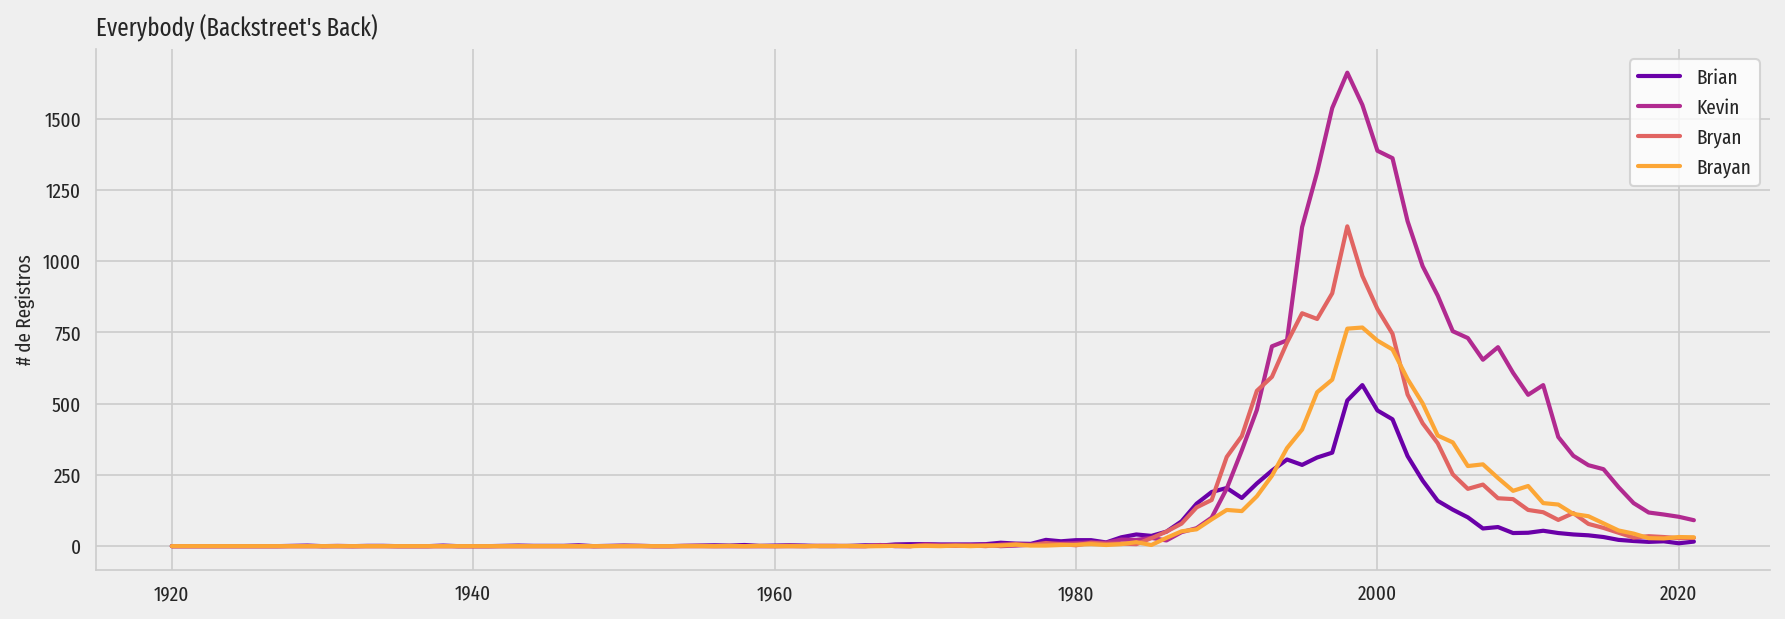

In [12]:
fig, ax = plot_nameseries(tabla_anual[["Brian", "Kevin", "Bryan", "Brayan"]].fillna(0))
ax.set_title("Everybody (Backstreet's Back)", loc="left")


Nesthar I
Nicolita I
Reipeng I
Pequeña I
Scherezad I
Ezperanza I
Europita I
Jeycoff I
Lefküruf I
Heliany I


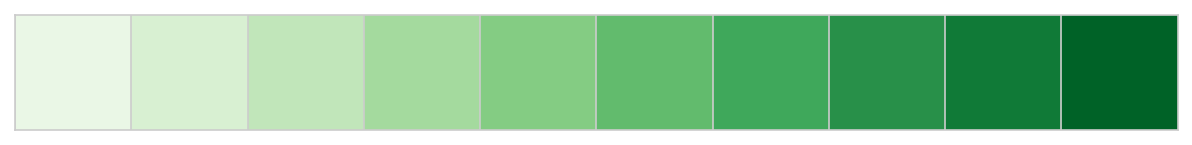

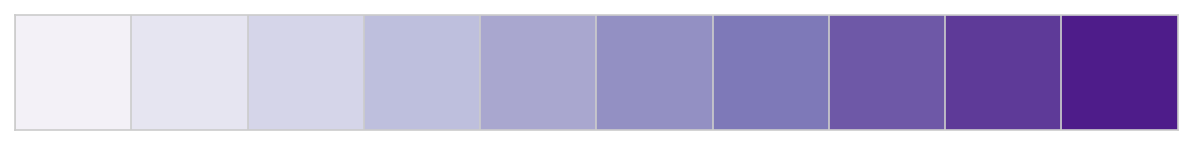

In [15]:
import numpy as np
from aves.visualization.tables.areas import streamgraph
from matplotlib.colors import rgb2hex

n_name_bins = 10

name_bin = pd.cut(np.log(total_n), n_name_bins, labels=False)

m_colors = list(map(rgb2hex, sns.color_palette("Greens", n_colors=n_name_bins)))
f_colors = list(map(rgb2hex, sns.color_palette("Purples", n_colors=n_name_bins)))

name_to_color = (
    guaguas.groupby(["nombre", "sexo"])["n"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .drop_duplicates(subset=["nombre"])
    .set_index("nombre")["sexo"]
    .to_dict()
)

for k, v in name_to_color.items():
    if v == "M":
        name_to_color[k] = m_colors[name_bin[k]]
    elif v == "F":
        name_to_color[k] = f_colors[name_bin[k]]
    else:
        # caso especial!
        print(k, v)
        name_to_color[k] = '#efefef'


sns.palplot(m_colors)
sns.palplot(f_colors)
# name_to_color


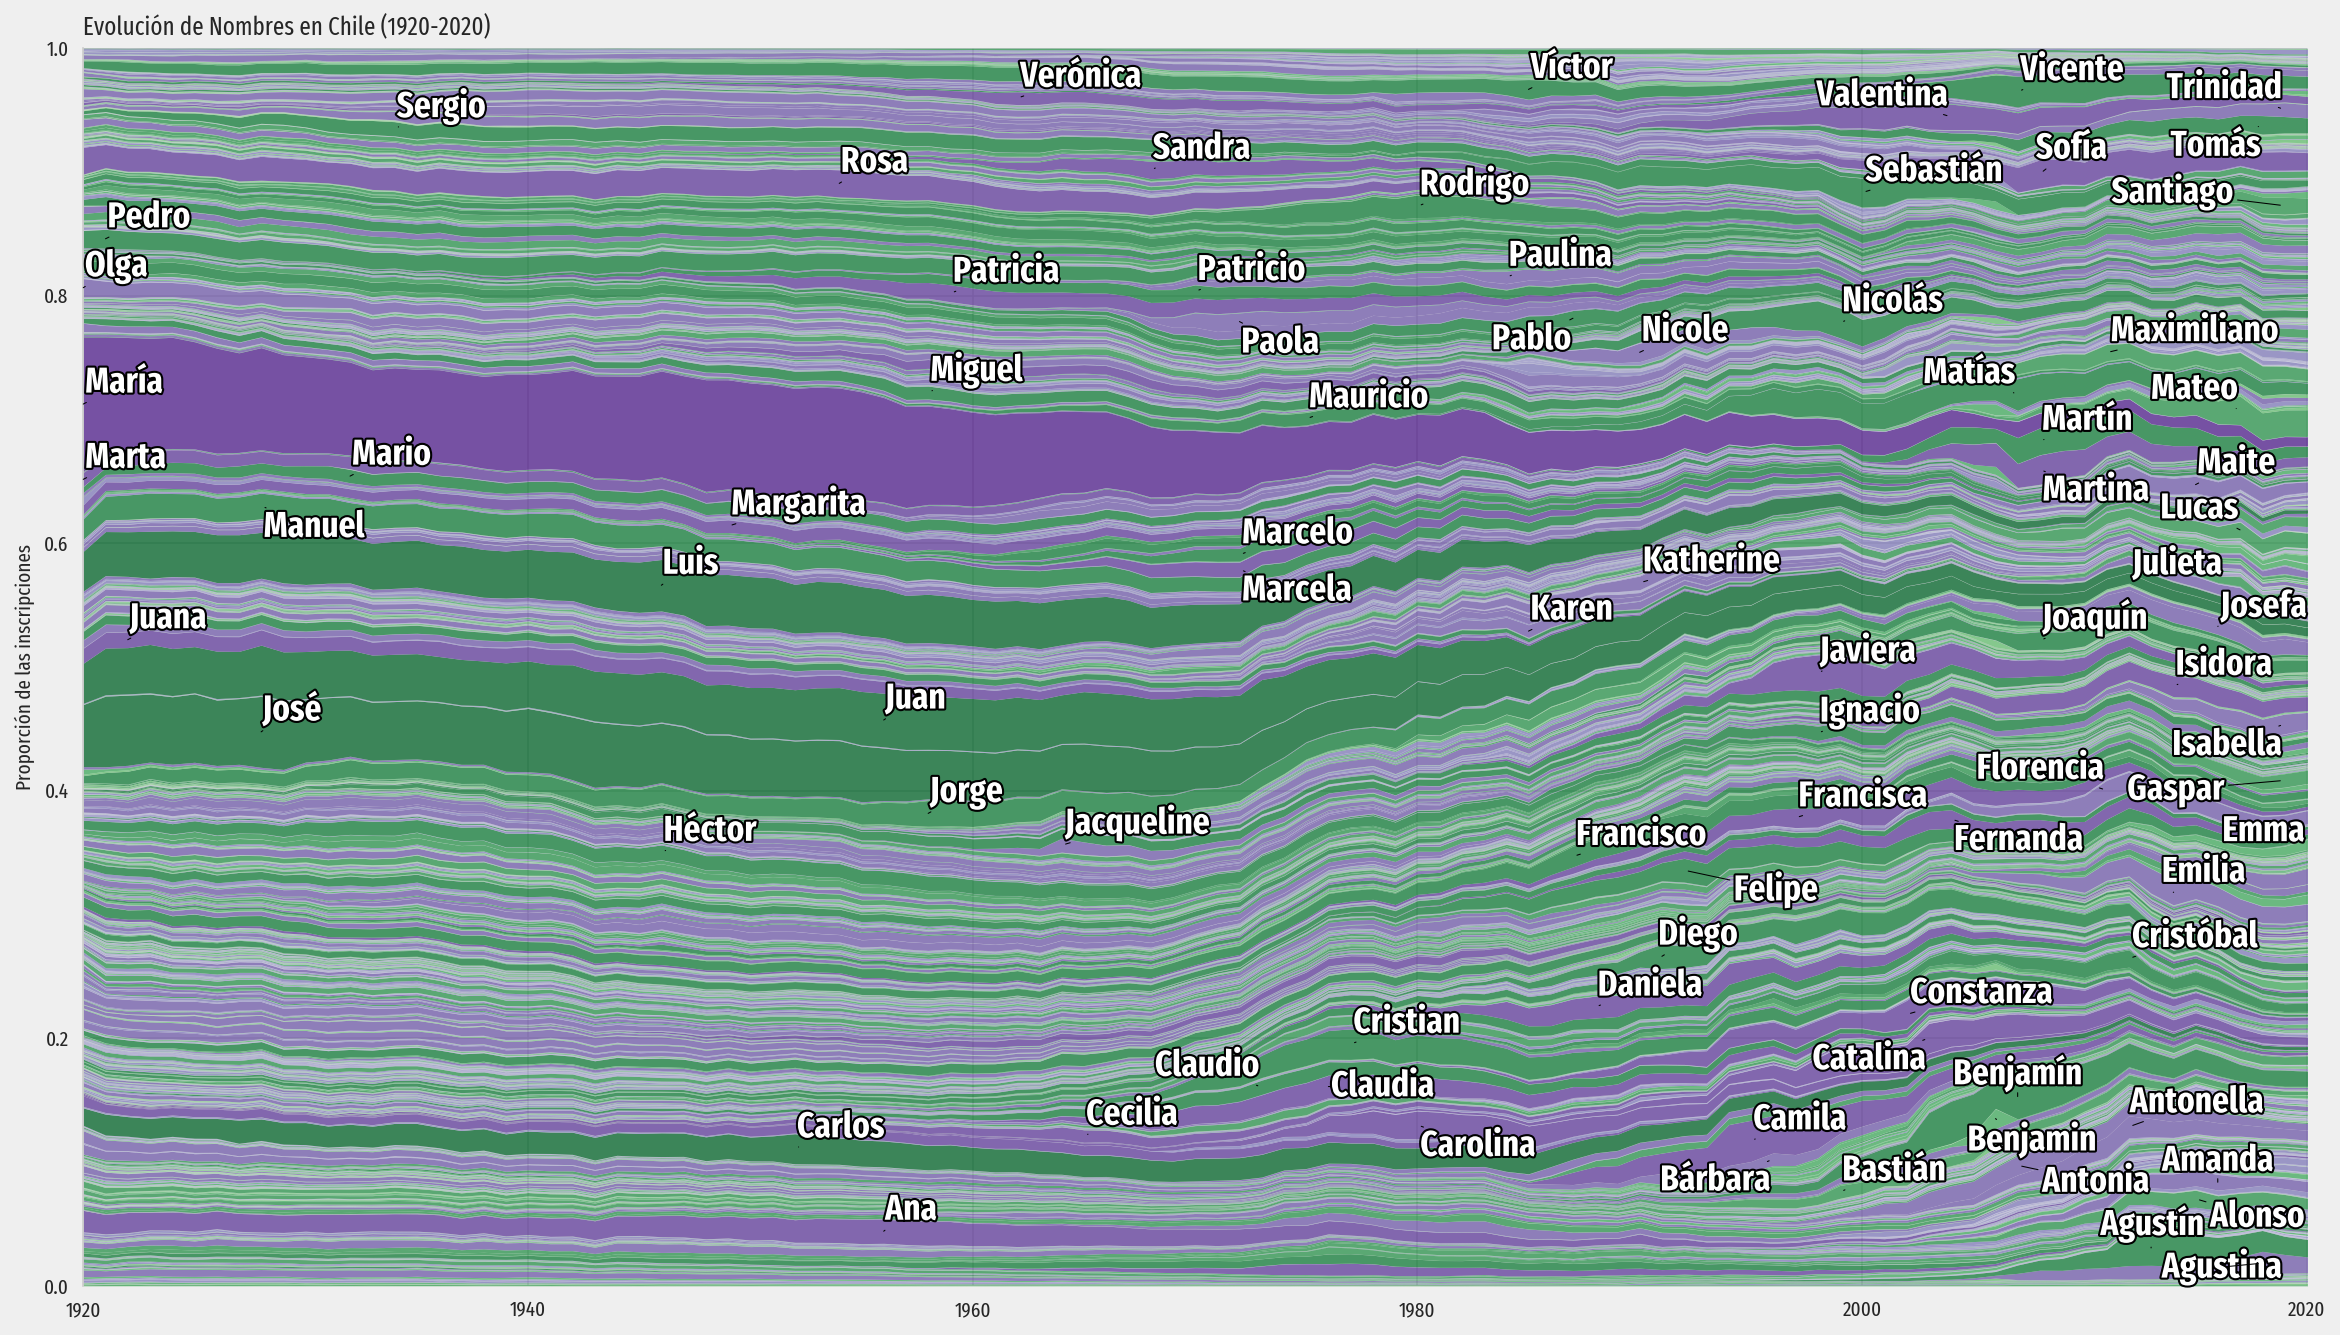

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1920, 2020])
ax.set_ylim([0, 1])
ax.set_title("Evolución de Nombres en Chile (1920-2020)", loc="left")
ax.set_ylabel("Proporción de las inscripciones")
ax.set_xlabel("")

streamgraph(
    ax,
    tabla_anual.fillna(0).pipe(normalize_rows),
    fig=fig,
    area_colors=name_to_color,
    baseline="zero",
    labels=True,
    label_threshold=0.01,
    avoid_label_collisions=True,
    area_args=dict(linewidth=0, alpha=0.75),
)


sns.despine(ax=ax, bottom=True, top=True)


In [17]:
from scipy.stats import entropy

tabla_entropia = (
    tabla_anual[total_n[total_n > 5000].index]
    .fillna(0)
    .apply(entropy)
    .sort_values(ascending=False)
)

tabla_entropia


Ismael      4.573738
Laura       4.564593
Octavio     4.563057
Exequiel    4.556844
Elisa       4.554436
              ...   
Isabella    2.770341
Mia         2.733904
Matias      2.591094
Liam        2.252419
Benjamin    2.234782
Length: 529, dtype: float64

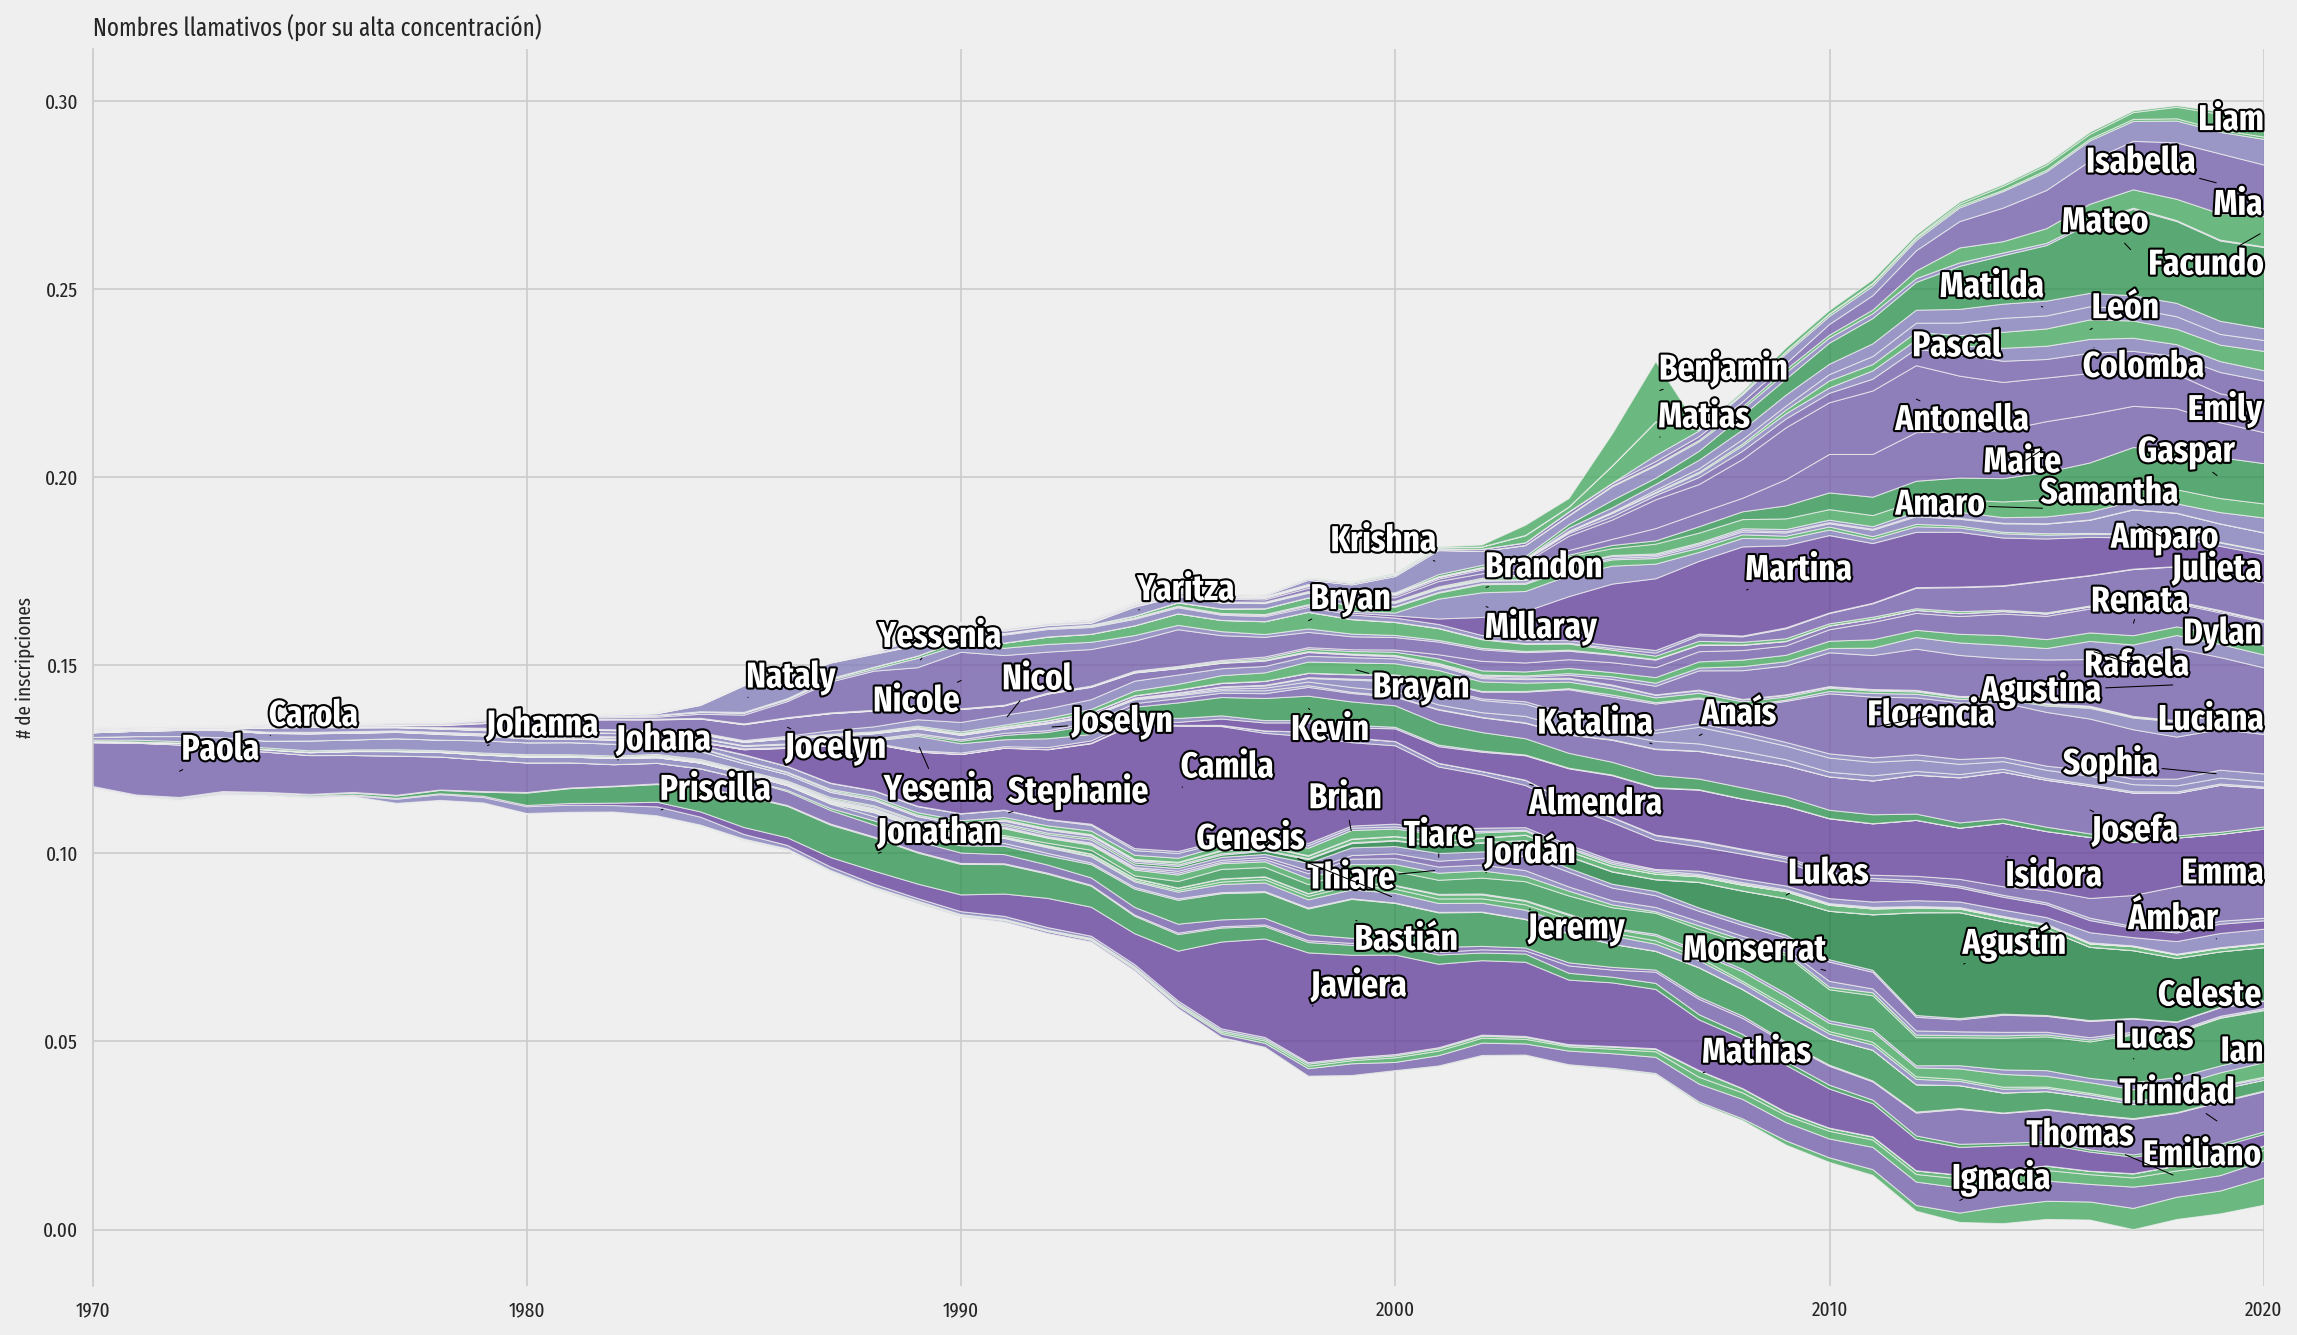

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1970, 2020])
ax.set_title('Nombres llamativos (por su alta concentración)', loc='left')
ax.set_ylabel('# de inscripciones')
ax.set_xlabel('')

streamgraph(
    ax,
    tabla_anual.pipe(normalize_rows)[tabla_entropia.tail(75).index],
    fig=fig,
    area_colors=name_to_color,
    area_args=dict(edgecolor="#efefef", linewidth=0.5, alpha=0.75),
    avoid_label_collisions=True,
)

sns.despine(ax=ax, bottom=True, top=True)


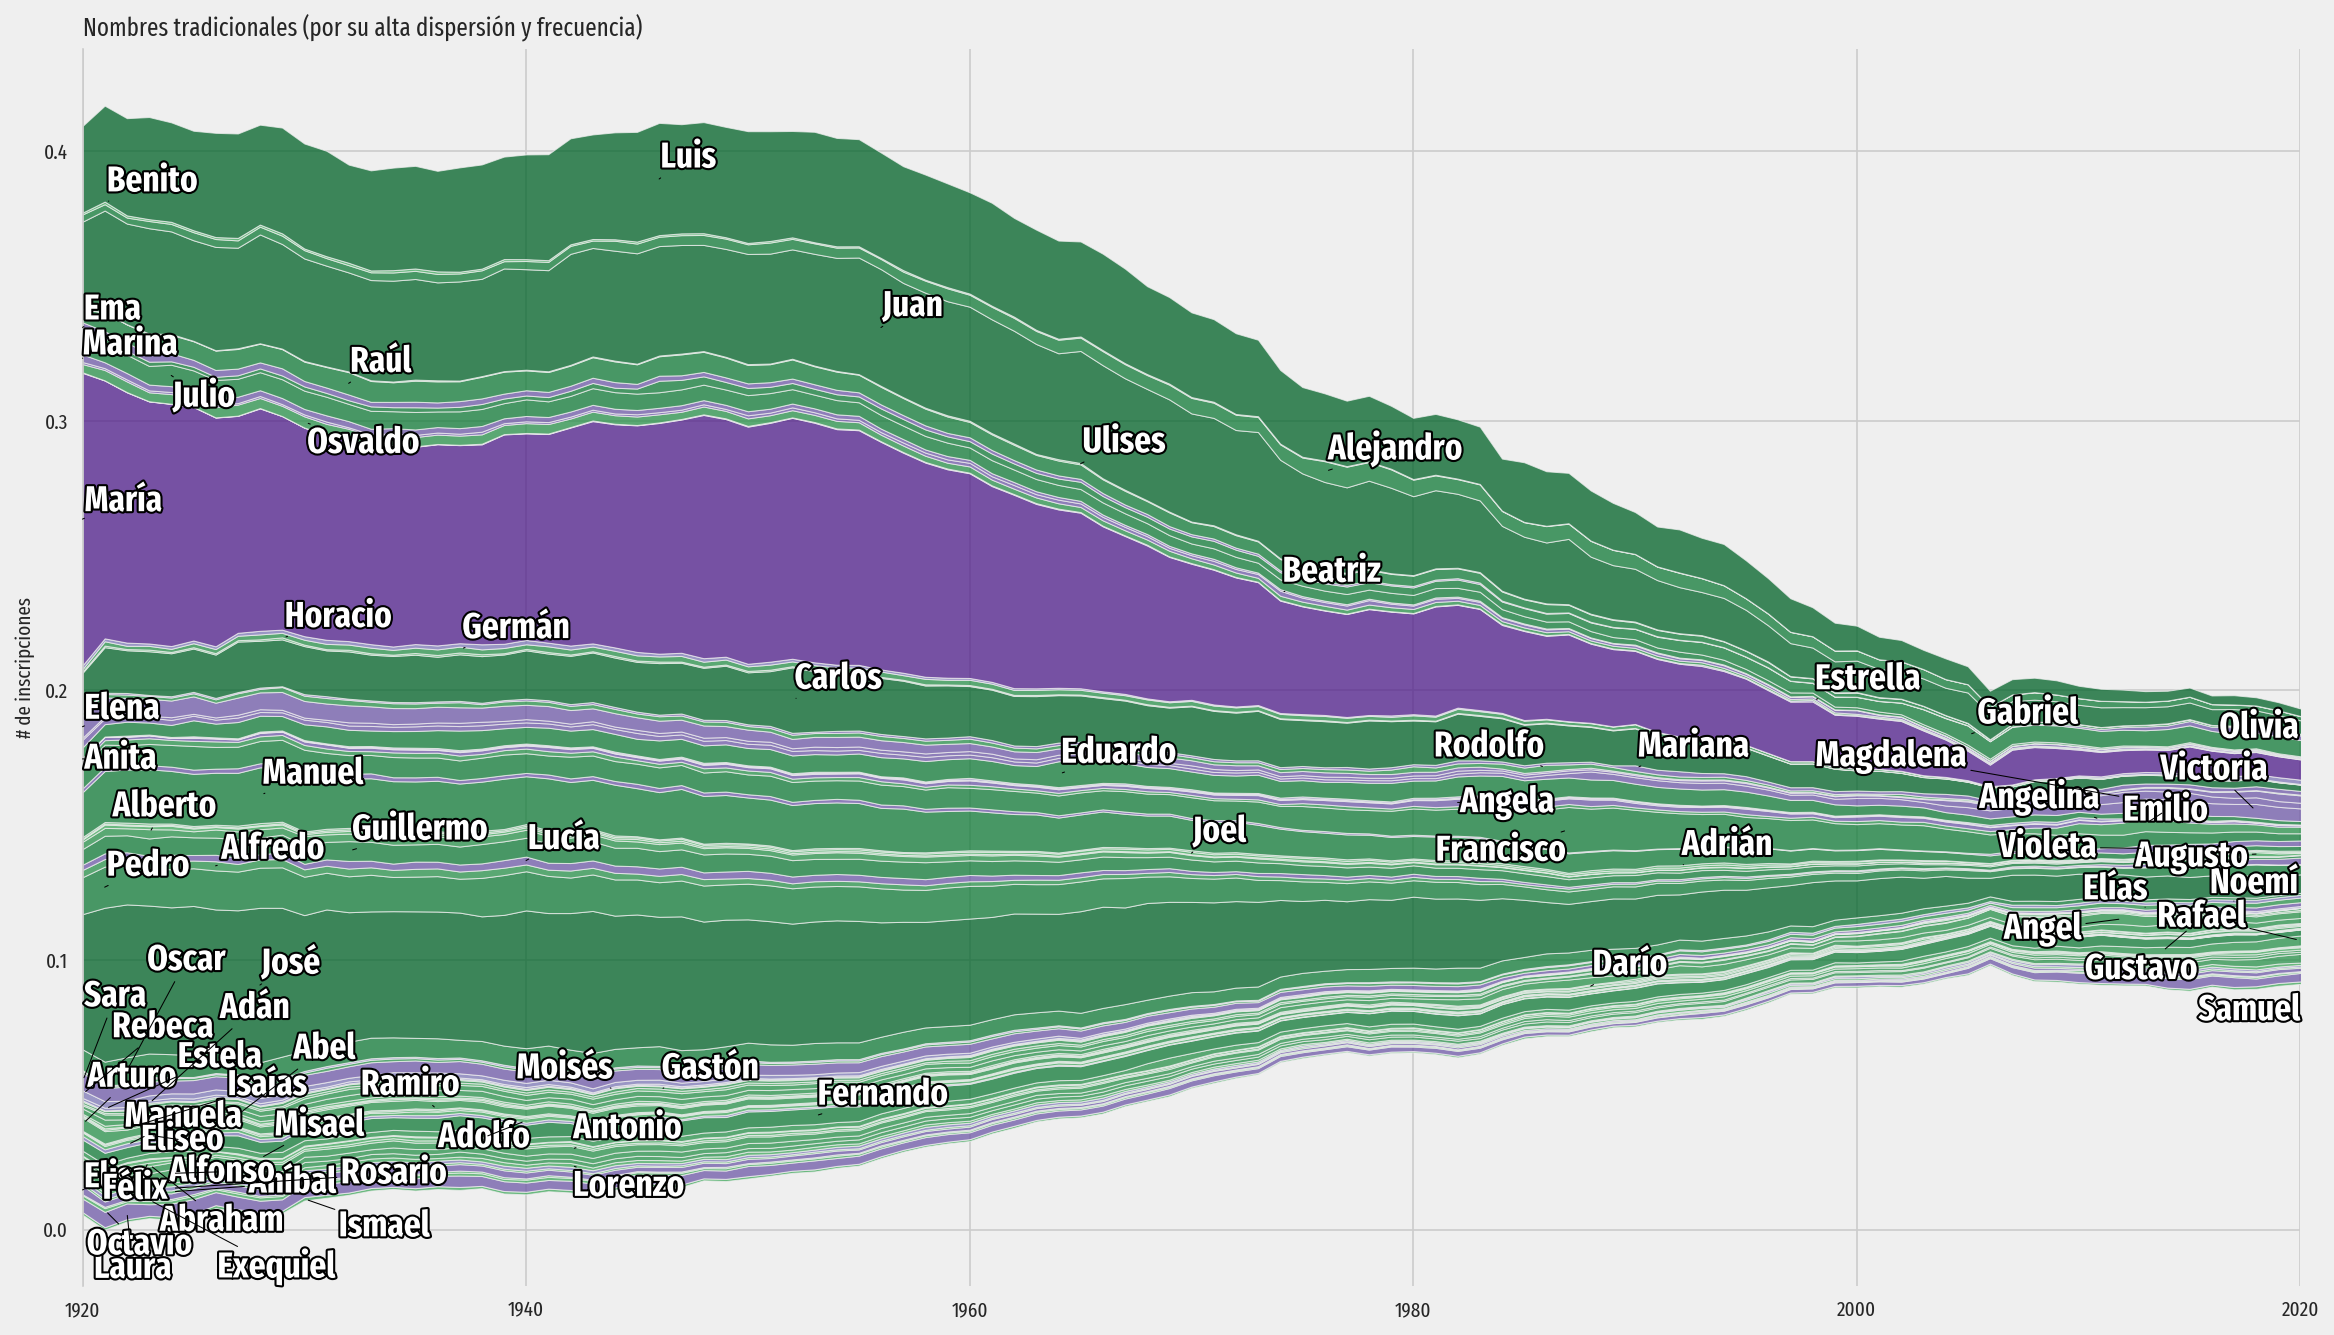

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))

fig.set_facecolor("#efefef")
ax.set_facecolor("#efefef")
ax.set_xlim([1920, 2020])
ax.set_title('Nombres tradicionales (por su alta dispersión y frecuencia)', loc='left')
ax.set_ylabel('# de inscripciones')
ax.set_xlabel('')

streamgraph(
    ax,
    tabla_anual.pipe(normalize_rows)[tabla_entropia.head(75).index],
    fig=fig,
    area_colors=name_to_color,
    area_args=dict(edgecolor="#efefef", linewidth=0.5, alpha=0.75),
    avoid_label_collisions=True,
)

sns.despine(ax=ax, bottom=True, top=True)


In [20]:
unisex_names = (
    pd.pivot_table(guaguas, index="nombre", columns="sexo", values="n", aggfunc="sum")
    .join(total_n)
    .fillna(0)
    .assign(mult=lambda x: x["F"] * x["M"])
    .pipe(lambda x: x[(x["mult"] > 0) & (x["n"] > 50)])
    .drop(["mult", "n"], axis=1)
    .pipe(normalize_rows)
    .pipe(lambda x: x[x["F"].between(0.02, 0.98)])
    .join(total_n)
)

unisex_names.sample(15)


F    I         M     n
nombre                                  
Jeremia    0.029851  0.0  0.970149    67
Salatiel   0.032520  0.0  0.967480   123
Danny      0.058684  0.0  0.941316  2522
Grey       0.977401  0.0  0.022599   177
Arlen      0.911765  0.0  0.088235   170
Alén       0.212121  0.0  0.787879   198
Lenny      0.247458  0.0  0.752542   295
Yussef     0.053333  0.0  0.946667    75
Eren       0.039216  0.0  0.960784    51
Aschley    0.946429  0.0  0.053571    56
Bonny      0.745614  0.0  0.254386   114
Jeimy      0.955912  0.0  0.044088   499
Atalia     0.979310  0.0  0.020690   145
Ascención  0.979118  0.0  0.020882   431
Kris       0.644068  0.0  0.355932   177

<AxesSubplot:ylabel='Frequency'>

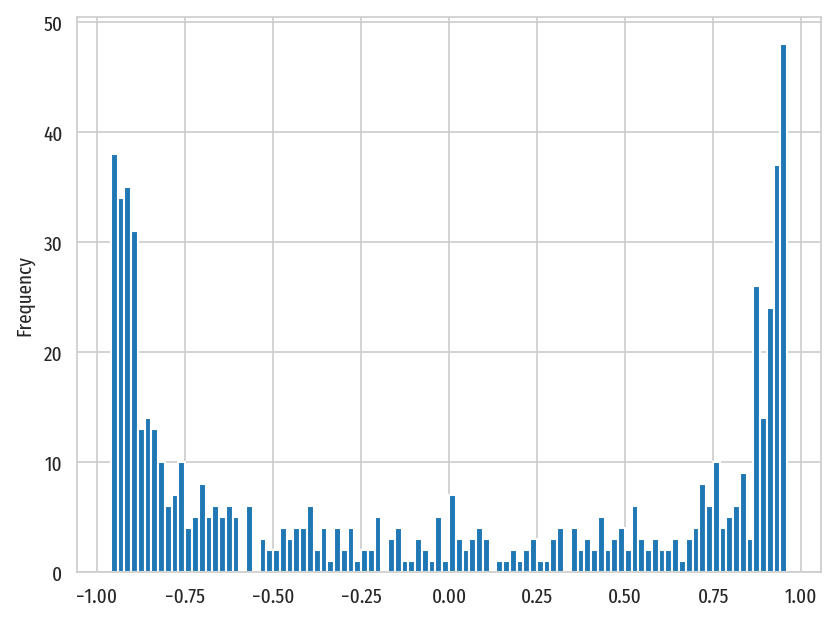

In [21]:
unisex_names["tendency"] = unisex_names["F"] - unisex_names["M"]
unisex_names["tendency"].plot(kind="hist", bins=100)


In [22]:
from aves.visualization.tables.bubbles import bubble_plot

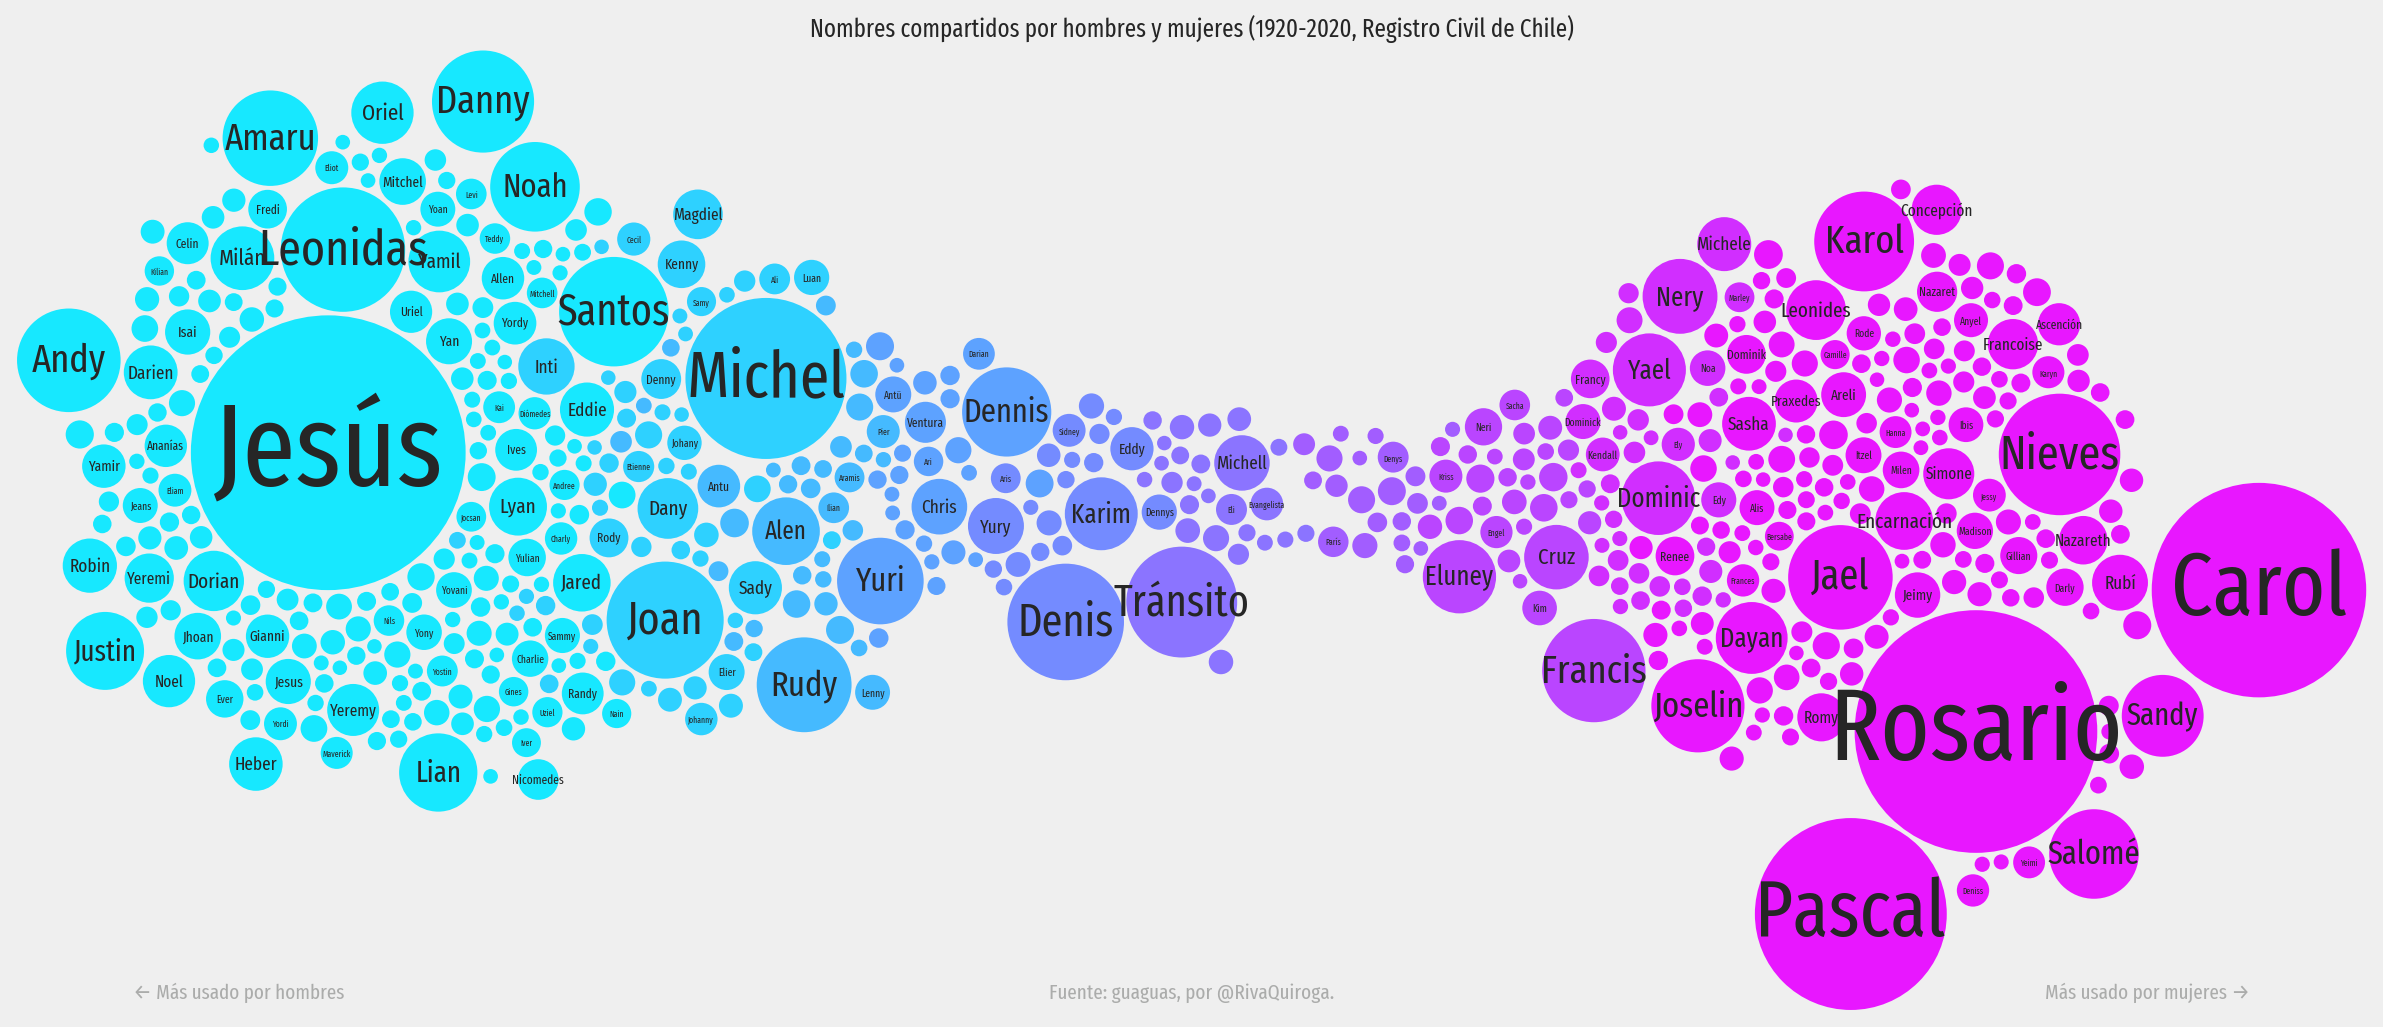

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))

bubble_plot(
    ax,
    unisex_names.reset_index(),
    "tendency",
    "n",
    label_column="nombre",
    palette="cool",
    max_label_size=56,
    starting_y_range=60, margin=2
)

ax.set_axis_off()
ax.set_title(
    "Nombres compartidos por hombres y mujeres (1920-2020, Registro Civil de Chile)"
)
ax.annotate(
    "Más usado por mujeres →",
    (0.95, 0.01),
    xycoords="axes fraction",
    ha="right",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "← Más usado por hombres",
    (0.05, 0.01),
    xycoords="axes fraction",
    ha="left",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)
ax.annotate(
    "Fuente: guaguas, por @RivaQuiroga.",
    (0.5, 0.01),
    xycoords="axes fraction",
    ha="center",
    va="bottom",
    fontsize="medium",
    color="#abacab",
)

fig.set_facecolor("#efefef")
fig.tight_layout()
